## Morphology

****

Morphology in OpenCV refers to a set of image processing operations that manipulate the shape and structure of objects in an image. These operations are based on mathematical morphology, which is a branch of mathematical theory that deals with the shape and structure of objects.

Morphological operations in OpenCV are typically performed on binary images, where each pixel is either black (0) or white (255). The most common morphological operations in OpenCV are erosion, dilation, opening, and closing.

Erosion is a morphological operation that shrinks the object boundaries by removing the pixels from the edges of the object. Erosion can be used to remove small objects or thin lines from an image.

Dilation is a morphological operation that expands the object boundaries by adding pixels to the edges of the object. Dilation can be used to fill small gaps in an object or to connect nearby objects.

Morphological operations in OpenCV can be performed using functions such as cv2.erode(), cv2.dilate(), etc. These functions take as input a binary image and a kernel, which is a structuring element that defines the shape and size of the operation. The kernel can be a simple 3x3 or 5x5 matrix, or a custom-shaped kernel can also be used.

Here is a brief explanation of each of the four most commonly used morphological functions in OpenCV:

Erosion:
Erosion is a morphological operation that removes the outermost layer of pixels in an image. The erosion function in OpenCV takes two arguments: the input image and a kernel, which defines the shape and size of the structuring element. During erosion, the kernel is placed over each pixel of the input image, and the output pixel is set to 0 (black) if any of the corresponding kernel pixels are 0. Otherwise, the output pixel is set to 1 (white).
The syntax for erosion function in OpenCV is:

cv2.erode(src, kernel[, dst[, anchor[, iterations[, borderType[, borderValue]]]]])

where src is the input image, kernel is the structuring element, dst is the output image, anchor is the kernel anchor point, iterations is the number of times the erosion operation is applied, borderType is the border type, and borderValue is the border value.

Dilation:
Dilation is a morphological operation that adds pixels to the outermost layer of an object in an image. The dilation function in OpenCV takes two arguments: the input image and a kernel, which defines the shape and size of the structuring element. During dilation, the kernel is placed over each pixel of the input image, and the output pixel is set to 1 (white) if any of the corresponding kernel pixels are 1. Otherwise, the output pixel is set to 0 (black).
The syntax for dilation function in OpenCV is:

cv2.dilate(src, kernel[, dst[, anchor[, iterations[, borderType[, borderValue]]]]])

where src is the input image, kernel is the structuring element, dst is the output image, anchor is the kernel anchor point, iterations is the number of times the dilation operation is applied, borderType is the border type, and borderValue is the border value.

If the edges detected by the Canny edge detector do not completely go around a face, you can extend them using morphological operations in OpenCV. 

In this code, we first load the input image and convert it to grayscale. We then apply the Canny edge detector to the grayscale image using the Canny function of OpenCV.

Next, we define a kernel for the dilation operation using the ones function of NumPy to create a 3x3 array of ones. We then apply the dilation operation to the edges image using the dilate function of OpenCV with the kernel and a single iteration.

We then find contours in the dilated edges image using the findContours function of OpenCV. We loop through each contour and draw a bounding box around it on the original image using the rectangle function of OpenCV.

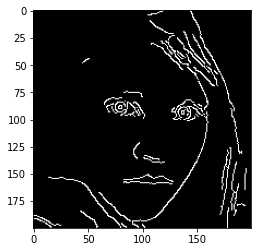

In [33]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('Graphics/face_conv.png')

# Convert the image to grayscale and apply Canny edge detection
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise
blur = cv2.GaussianBlur(gray, (3, 3), 0)

# Apply Canny edge detection
edges = cv2.Canny(blur, 150, 250)

# Define a kernel for the dilation operation
# kernel = np.ones((3,3), np.uint8)

# Apply the dilation operation to extend the edges
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
dilated = cv2.dilate(edges, kernel, iterations=2)
eroded = cv2.erode(dilated, kernel, iterations=2)

# Find contours in the dilated edges image
contours, hierarchy = cv2.findContours(eroded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Loop through each contour and draw a bounding box around it
for contour in contours:
    # Get the bounding box coordinates
    x, y, w, h = cv2.boundingRect(contour)
    
    # Draw the bounding box on the original image
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 1)

# Display the image with the bounding boxes around the detected faces
plt.imshow(edges, cmap='gray')
